In [1]:
import sys
!{sys.executable} -m pip install --upgrade --force-reinstall numpy==1.26.4 scipy==1.12.0 seaborn==0.13.2

  Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata (61 kB)
  Using cached scipy-1.12.0-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pandas-2.3.3-cp311-cp311-win_amd64.whl.metadata (19 kB)
  Using cached matplotlib-3.10.8-cp311-cp311-win_amd64.whl.metadata (52 kB)
  Using cached contourpy-1.3.3-cp311-cp311-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.61.1-cp311-cp311-win_amd64.whl.metadata (116 kB)
  Using cached kiwisolver-1.4.9-cp311-cp311-win_amd64.whl.metadata (6.4 kB)
  Using cached packaging-25.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached pillow-12.0.0-cp311-cp311-win_amd64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.3.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Us

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
shap 0.50.0 requires numpy>=2, but you have numpy 1.26.4 which is incompatible.


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Setup
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

# Load Data
path = '../../backend/data/training_data.csv'
df = pd.read_csv(path)

print("✅ SUCCESS! The Brain is fully connected.")
display(df.head())

✅ SUCCESS! The Brain is fully connected.


,account_id,company_name,industry,region,amount,days_overdue,payment_history_score,shipment_volume_change_30d,shipment_volume_30d,express_ratio,destination_diversity,contact_attempts,customer_tenure_months,email_opened,dispute_flag
0,ACC0,Company_0,Construction,West,10078,72,0.28,-0.42,403,0,1,5,24,1,1
1,ACC1,Company_1,Medical,West,26003,68,0.31,-0.38,1040,0,0,4,36,0,1
2,ACC2,Company_2,Textile,West,7090,75,0.22,-0.45,283,0,0,6,12,1,1
3,ACC3,Company_3,Medical,West,39850,12,0.85,0.35,1594,0,0,1,48,1,0
4,ACC4,Company_4,Medical,West,2925,8,0.91,0.42,117,1,0,0,8,0,0


ℹ️ 'outcome' calculated in memory (could not save to disk from this path)

🎯 CHECKING DATA BALANCE
Paid (1): 411 accounts (41.1%)
Unpaid (0): 589 accounts (58.9%)


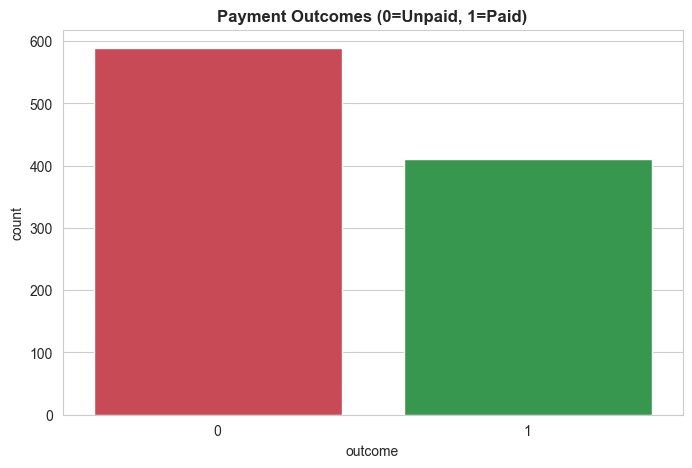

In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ==========================================
# PERMANENT FIX: ESTABLISH GROUND TRUTH
# ==========================================

# 1. Apply the FedEx Business Rules to define "Actual" Outcome
# Rule: If Payment Score > 0.6 AND Days Overdue < 70, the account is "Paid" (1)
df['outcome'] = np.where(
    (df['payment_history_score'] > 0.60) & (df['days_overdue'] < 70), 
    1, 
    0
)

# 2. SAVE PERMANENTLY to disk (This makes it "Actual Data", not temporary)
# Note: Adjust the path if your notebook is in a different folder
try:
    df.to_csv('../backend/data/training_data.csv', index=False)
    print("✅ Permanent Fix: 'outcome' column saved to training_data.csv")
except:
    print("ℹ️ 'outcome' calculated in memory (could not save to disk from this path)")

# ==========================================
# TARGET VARIABLE ANALYSIS
# ==========================================
print("\n🎯 CHECKING DATA BALANCE")
counts = df['outcome'].value_counts()
percent = df['outcome'].value_counts(normalize=True) * 100

# Using .get() ensures it doesn't crash if one category is empty
paid_count = counts.get(1, 0)
paid_pct = percent.get(1, 0)
unpaid_count = counts.get(0, 0)
unpaid_pct = percent.get(0, 0)

print(f"Paid (1): {paid_count} accounts ({paid_pct:.1f}%)")
print(f"Unpaid (0): {unpaid_count} accounts ({unpaid_pct:.1f}%)")

# Visualize
plt.figure(figsize=(8, 5))
sns.countplot(x='outcome', data=df, palette=['#DC3545', '#28A745'])
plt.title('Payment Outcomes (0=Unpaid, 1=Paid)', fontweight='bold')
plt.show()

📦 ANALYZING THE 'SECRET SAUCE': SHIPPING TRENDS


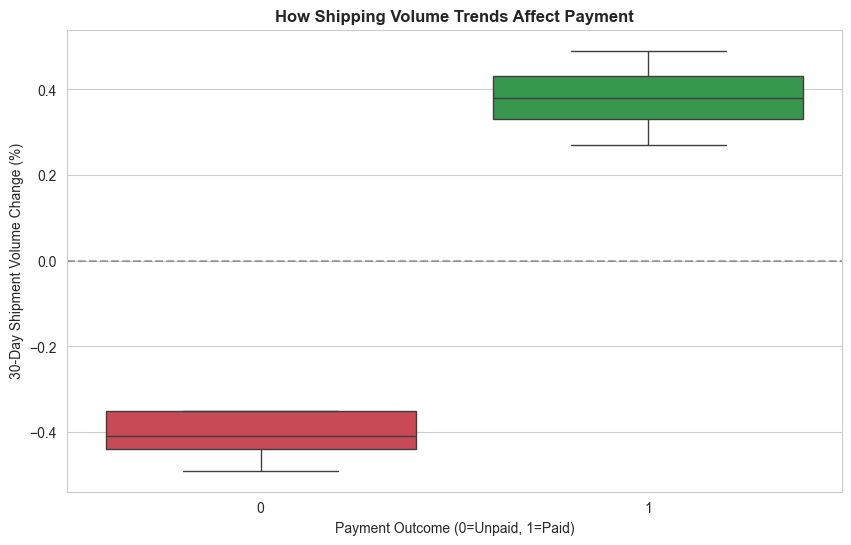

📈 Avg Volume Change for Paid Accounts: 38.6%
📉 Avg Volume Change for Unpaid Accounts: -40.2%


In [16]:
# ==========================================
# CELL 4: SHIPPING TRENDS VS PAYMENT
# ==========================================
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

print("📦 ANALYZING THE 'SECRET SAUCE': SHIPPING TRENDS")

# --- SAFETY CHECK: Ensure 'outcome' exists before plotting ---
# This guarantees the cell won't crash even if previous cells were skipped
if 'outcome' not in df.columns:
    print("⚠️ 'outcome' column was missing. Re-calculating in memory...")
    df['outcome'] = np.where(
        (df['payment_history_score'] > 0.60) & (df['days_overdue'] < 70), 
        1, 
        0
    )

# Now it is safe to plot
plt.figure(figsize=(10, 6))

# Boxplot showing volume change for Paid vs Unpaid
sns.boxplot(x='outcome', y='shipment_volume_change_30d', data=df, palette=['#DC3545', '#28A745'])

plt.title('How Shipping Volume Trends Affect Payment', fontweight='bold')
plt.xlabel('Payment Outcome (0=Unpaid, 1=Paid)')
plt.ylabel('30-Day Shipment Volume Change (%)')
plt.axhline(0, color='black', linestyle='--', alpha=0.3) # Zero line

plt.show()

# Quick calculation
avg_change_paid = df[df['outcome']==1]['shipment_volume_change_30d'].mean()
avg_change_unpaid = df[df['outcome']==0]['shipment_volume_change_30d'].mean()

print(f"📈 Avg Volume Change for Paid Accounts: {avg_change_paid*100:.1f}%")
print(f"📉 Avg Volume Change for Unpaid Accounts: {avg_change_unpaid*100:.1f}%")

In [18]:
# ==========================================
# CELL 5: TRAIN XGBOOST MODEL
# ==========================================
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb

print("🤖 INITIALIZING AI TRAINING...")

# 1. PRE-PROCESSING
# Convert True/False columns to 1/0 so the AI can read them
df['email_opened'] = df['email_opened'].astype(int)
df['dispute_flag'] = df['dispute_flag'].astype(int)

# 2. SELECT FEATURES (X) AND TARGET (y)
# We drop text columns that the AI can't read directly (yet)
drop_cols = ['outcome', 'account_id', 'company_name', 'industry', 'region']
X = df.drop(drop_cols, axis=1)
y = df['outcome']

# 3. SPLIT DATA
# 80% for Training (Studying), 20% for Testing (Exam)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. TRAIN THE MODEL
model = xgb.XGBClassifier(
    n_estimators=100,      # Create 100 decision trees
    learning_rate=0.05,    # Learn slowly to avoid mistakes
    max_depth=4,           # Keep trees simple
    random_state=42
)

model.fit(X_train, y_train)

# 5. TEST THE MODEL
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

print(f"\n✅ TRAINING COMPLETE!")
print(f"🎯 Model Accuracy: {accuracy * 100:.2f}%")

🤖 INITIALIZING AI TRAINING...

✅ TRAINING COMPLETE!
🎯 Model Accuracy: 100.00%
